# Multiple Linear Regression
## Cars Case Study
#### Problem Statement: Build a multiple linear regression model for the athe price of cars with the available independent variables

### Step 1: Reading and Understanding the Data(Data Preparation)

#### Import NumPy and Pandas and read the cars dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
cars_data = pd.read_csv("C:\\Users\\BHASSRIN\\CarPrice_Assignment.csv")

In [ ]:
# Check the head of the dataset
cars_data.head()

In [6]:
#Inspect the various aspects of the housing dataframe
cars_data.shape

(205, 26)

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step-2: Preprocessing : Data Cleaning & Preparation
 Since we need to consider only company name as the independent variable for model building, creating a new column
 named 'carCompanyName' which will have only company name.

In [8]:


cars_data['CarCompanyName'] = cars_data["CarName"].str.split(" ", n = 1, expand = True)[0]
cars_data['CarName']
cars_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompanyName'],
      dtype='object')

In [9]:
##Convert all CarCompanyNames to lower case.
cars_data.CarCompanyName = cars_data.CarCompanyName.astype(str).str.lower()
cars_data['CarCompanyName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

In [10]:
##Now clean the CarCompanyName so that the companies are uniformely named
cars_data['CarCompanyName'].replace('mazda', 'maxda', inplace=True)
cars_data['CarCompanyName'].replace('vokswagen', 'volkswagen', inplace=True)
cars_data['CarCompanyName'].replace('toyouta', 'toyota', inplace=True)
cars_data['CarCompanyName'].replace('vw', 'volkswagen', inplace=True)
cars_data['CarCompanyName'].replace('porcshce','porsche', inplace=True)
cars_data['CarCompanyName']
##Check the unique CarCompanyNames
len(cars_data['CarCompanyName'].unique().tolist())

22

In [11]:
## clean the drivewheel, since few columns as 4wd instead of fwd

cars_data['drivewheel'].replace('4wd','fwd', inplace=True)
cars_data['drivewheel'].unique().tolist()

['rwd', 'fwd']

### Data Preparation 

  dataset has many columns with only 2 different categorical values.  
  In order to fit a regression line, we would need numerical values and not string.  
  So convert the following categorical variables to numerical.  
  Convert 'engine location' to numerical value, we need to convert them to 1s and 0s, where 1 is a 'front' and 0 is a 'rear'.  
  Convert fueltype to numerical value, we need to convert them to 1s and 0s, where 1 is a 'gas' and 0 is a 'diesel'.  
  Convert doornumber to numerical value, we need to convert them to 1s and 0s, where 1 is a 'two' and 0 is a 'four'.  
  Convert aspiration to numerical value, we need to convert them to 1s and 0s, where 1 is a 'std' and 0 is a 'turbo'.

In [12]:
cars_data['enginelocation'].replace('front', 1, inplace=True)
cars_data['enginelocation'].replace('rear', 0, inplace=True)
cars_data['fueltype'].replace('gas', 1, inplace=True)
cars_data['fueltype'].replace('diesel', 0, inplace=True)
cars_data['doornumber'].replace('two', 1, inplace=True)
cars_data['doornumber'].replace('four', 0, inplace=True)
cars_data['aspiration'].replace('std', 1, inplace=True)
cars_data['aspiration'].replace('turbo', 0, inplace=True)
cars_data['aspiration'].unique().tolist()
cars_data.head(10)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,1,3,alfa-romero giulia,1,1,1,convertible,rwd,1,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,1,1,1,convertible,rwd,1,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,1,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,1,1,0,sedan,fwd,1,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,1,1,0,sedan,fwd,1,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,audi fox,1,1,1,sedan,fwd,1,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,1,1,0,sedan,fwd,1,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,1,1,0,wagon,fwd,1,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,1,0,0,sedan,fwd,1,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),1,0,1,hatchback,fwd,1,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


 Replace the cylindernumber with equivalent number

In [13]:
cars_data['cylindernumber'].replace('two', 2, inplace=True)
cars_data['cylindernumber'].replace('three', 3, inplace=True)
cars_data['cylindernumber'].replace('four', 4, inplace=True)
cars_data['cylindernumber'].replace('five', 5, inplace=True)
cars_data['cylindernumber'].replace('six', 6, inplace=True)
cars_data['cylindernumber'].replace('eight', 8, inplace=True)
cars_data['cylindernumber'].replace('twelve', 12, inplace=True)
cars_data['cylindernumber'].unique().tolist()

[4, 6, 5, 3, 12, 2, 8]

In [14]:
#Now add a new derive variable volume by multiplying carlength carwidth carheight

cars_data['volume'] = cars_data['carlength'] * cars_data['carwidth']* cars_data['carheight']
cars_data['volume']

cars_data = cars_data.drop([ 'carlength', 'carwidth', 'carheight'],   axis=1)
cars_data =  cars_data.drop(['CarName', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'CarCompanyName'], axis=1)                                   
cars_data =  cars_data.drop(['car_ID'], axis=1)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
volume              205 non-null float64
dtypes: float64(6), int64(12)
memory usage: 28.9 KB


### Step 4: Visualising the Data
 Here we will understand whether there exists multicollenearity exists 
 This will be done using matplotlib and seaborn.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

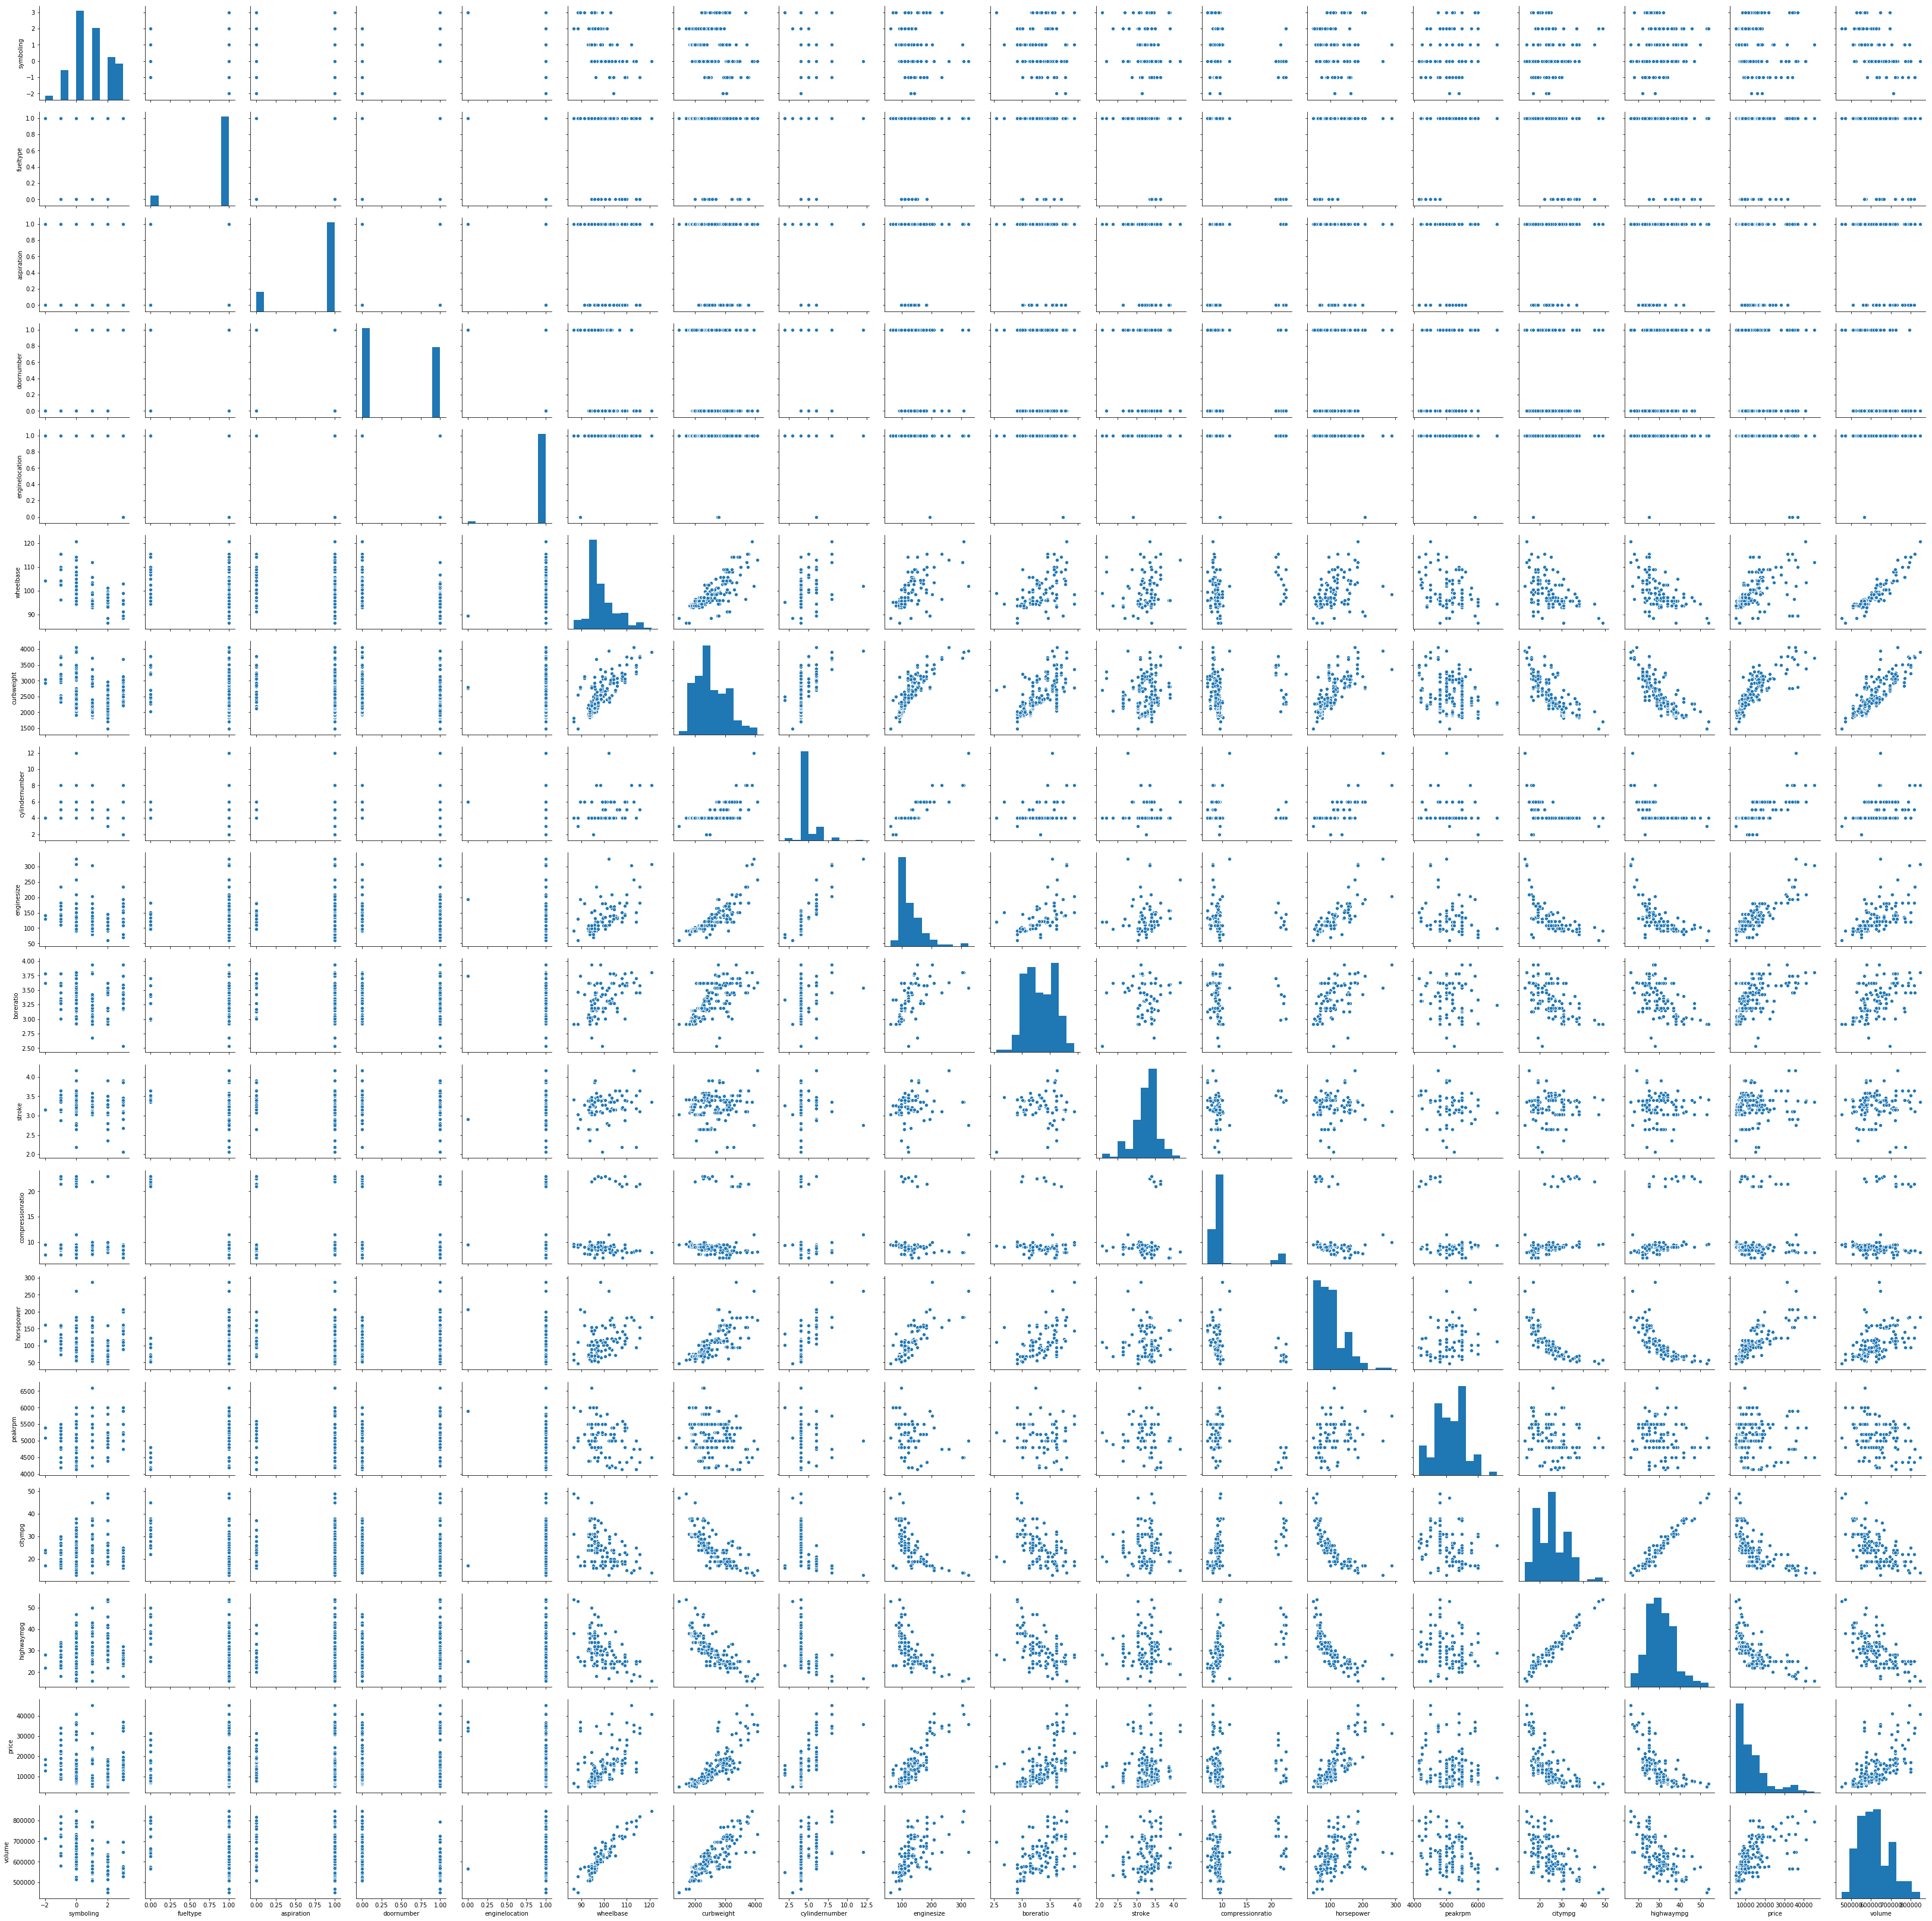

In [16]:
##Visualising Numeric Variables using pairplot of all the numeric variables.
sns.pairplot(cars_data)
plt.show()

#### Visualising Categorical Variables

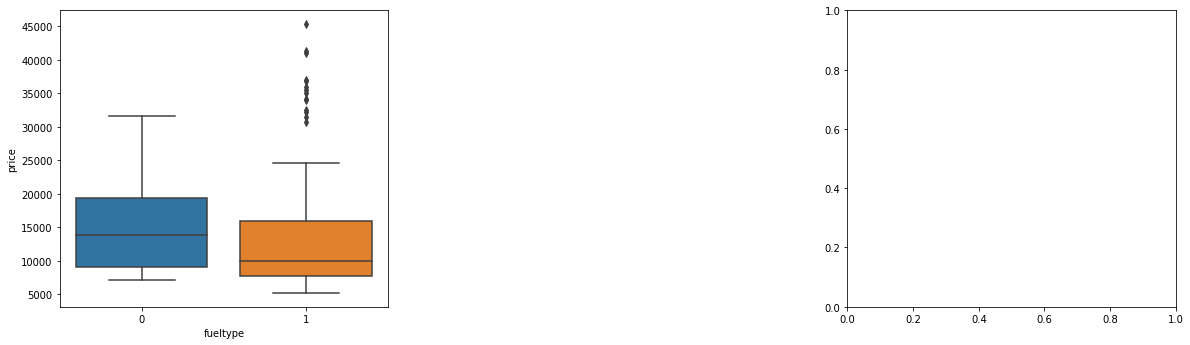

In [84]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
###sns.boxplot(x = 'CarCompanyName', y = 'price', data = cars_data)
###plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
###sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
###plt.subplot(2,3,4)
###sns.boxplot(x = 'doornumber', y = 'price', data = cars_data)
###plt.subplot(2,3,5)
###sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
###plt.subplot(2,3,6)
###sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)

plt.show()

### Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [34]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
cars_train, cars_test = train_test_split(cars_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
cars_data.shape
cars_train.shape
cars_test.shape



(62, 18)

In [36]:
##Rescaling the Features using MinMax

from sklearn.preprocessing import MinMaxScaler


In [37]:
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'volume']

cars_train[num_vars] = scaler.fit_transform(cars_train[num_vars])


In [39]:
cars_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,volume
122,1,1,1,0,1,0.244828,0.272692,4,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0.243366
125,3,1,1,1,1,0.272414,0.500388,4,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0.343542
166,1,1,1,1,1,0.272414,0.314973,4,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0.313145
1,3,1,1,1,1,0.068966,0.411171,4,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0.204773
199,-1,1,0,0,1,0.610345,0.647401,4,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0.752188


In [40]:
cars_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,volume
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.909091,0.818182,0.440559,0.993007,0.411141,0.407878,4.405594,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.437947
std,1.195999,0.288490,0.387050,0.498199,0.083624,0.205581,0.211269,1.158178,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.216789
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.272414,0.245539,4.000000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.280120
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.341379,0.355702,4.000000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.385733
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.503448,0.559542,4.000000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,0.563951
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Let's check the correlation coefficients to see which variables are highly correlated


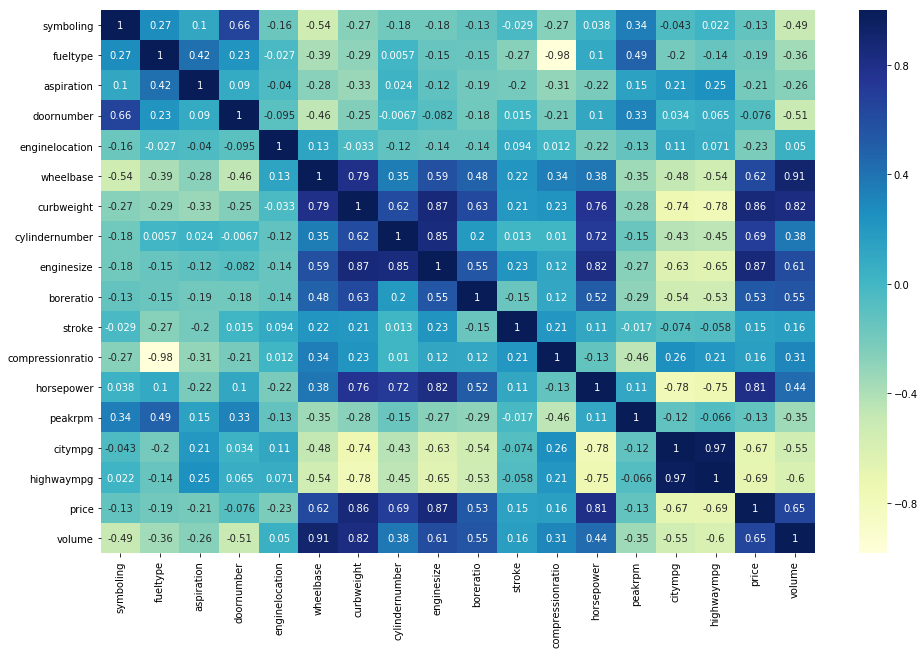

In [41]:
plt.figure(figsize = (16, 10))
sns.heatmap(cars_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

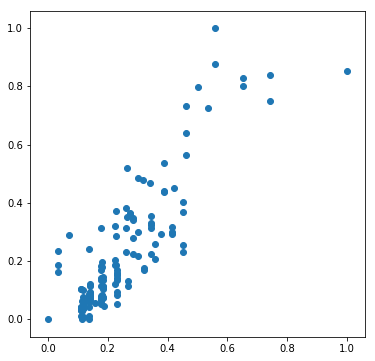

In [42]:
##As per above heatmap, 'enginesize' seems to the correlated to `price` the most.
##Let us see a pairplot for `enginesize` vs `price`.

plt.figure(figsize=[6,6])
plt.scatter(cars_train.enginesize, cars_train.price)
plt.show()

#### Dividing into X and Y sets for the model building

In [43]:
y_train = cars_train.pop('price')
X_train = cars_train

#### Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. 
Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [44]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [45]:
# Check the parameters obtained

lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

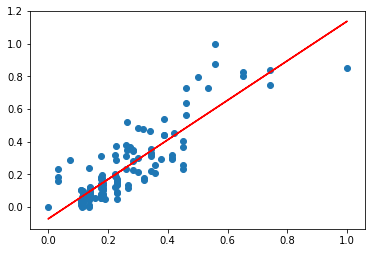

In [46]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.0728 +  1.210*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [47]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.09e-44
Time:                        20:28:46   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

Adding another variable

The R-squared value obtained is 0.753. Since we have so many variables, 
we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. curbweight


In [48]:
# Assign all the feature variables to X

X_train_lm = X_train[['enginesize', 'curbweight', 'horsepower']]

#### Build a linear model

In [49]:


import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.126942
enginesize    0.474331
curbweight    0.402044
horsepower    0.298222
dtype: float64

In [50]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.16e-51
Time:                        20:29:42   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

In [51]:
cars_data.columns
cars_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
volume              205 non-null float64
dtypes: float64(6), int64(12)
memory usage: 28.9 KB


In [53]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr_1.params
#X_train.info()

const               0.419735
symboling           0.006088
fueltype            0.008831
aspiration         -0.005995
doornumber          0.018204
enginelocation     -0.235525
wheelbase           0.107177
curbweight          0.112760
cylindernumber     -0.069111
enginesize          1.258718
boreratio          -0.264233
stroke             -0.281132
compressionratio    0.115908
horsepower          0.356944
peakrpm             0.086678
citympg            -0.144285
highwaympg          0.145321
volume              0.153954
dtype: float64

In [54]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     45.04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           5.62e-45
Time:                        20:30:22   Log-Likelihood:                 157.35
No. Observations:                 143   AIC:                            -278.7
Df Residuals:                     125   BIC:                            -225.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4197      0.287  

In [55]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop(['fueltype', 'symboling', 'aspiration', 'doornumber', 'citympg'], axis=1)



#### Build a second fitted model

In [57]:

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     64.80
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           7.84e-49
Time:                        20:31:50   Log-Likelihood:                 155.90
No. Observations:                 143   AIC:                            -285.8
Df Residuals:                     130   BIC:                            -247.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4754      0.161  

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,355.22
7,cylindernumber,296.96
4,enginelocation,181.90
15,highwaympg,146.69
8,enginesize,141.11
14,citympg,135.78
6,curbweight,107.37
16,volume,52.47
11,compressionratio,52.46
5,wheelbase,42.10


In [62]:
y_train_price = lr_2.predict(X_train_lm)

#### Residual Analysis of the train data

Plot the histogram of the error terms

Text(0.5,0,'Errors')

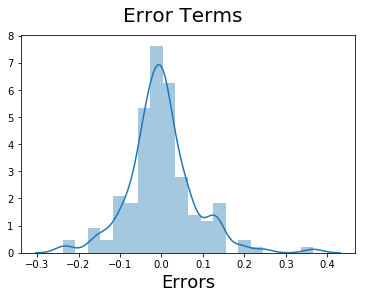

In [65]:

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 8: Making Predictions Using the Final Model
#### Applying the scaling on the test sets

In [66]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'volume']

cars_test[num_vars] = scaler.transform(cars_test[num_vars])
#cars_test[num_vars]

In [67]:
cars_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.887097,0.822581,0.435484,0.967742,0.437764,0.428470,4.322581,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.481674
std,1.358620,0.319058,0.385142,0.499868,0.178127,0.212861,0.179488,0.882883,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.212340
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128394,4.000000,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.045493
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.313793,0.305275,4.000000,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.317799
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.387931,0.406129,4.000000,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.466220
75%,2.000000,1.000000,1.000000,1.000000,1.000000,0.570690,0.564876,4.000000,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243,0.646794
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.182759,0.935609,8.000000,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855,1.068636


In [75]:
cars_test = cars_test.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation'], axis=1)
y_test = cars_test.pop('price')
X_test = cars_test

cars_test.info()
cars_test.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 12 columns):
wheelbase           62 non-null float64
curbweight          62 non-null float64
cylindernumber      62 non-null int64
enginesize          62 non-null float64
boreratio           62 non-null float64
stroke              62 non-null float64
compressionratio    62 non-null float64
horsepower          62 non-null float64
peakrpm             62 non-null float64
citympg             62 non-null float64
highwaympg          62 non-null float64
volume              62 non-null float64
dtypes: float64(11), int64(1)
memory usage: 6.3 KB


Index(['wheelbase', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'volume'],
      dtype='object')

In [76]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)


In [77]:
# Making predictions using the fourth model

y_pred_m2 = lr_2.predict(X_test_m2)
#lr_2.shape
#X_test_m2.columns

#### Step 9: Model Evaluation

### Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

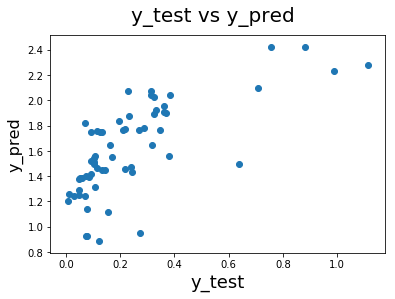

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   





We can see that the equation of our best fitted line is:
 $ price = 0.2308 \times enginelocation + 0.0743 \times wheelbase + 0.0996 \times curbweight - 0.076 \times cylindernumber
 + 1.2906 \times enginesize - 0.27 \times boreratio - 0.2755 \times stroke
 + 0.1131 \times compressionratio + 0.4248 \times horsepower + 0.0901 \times peakrpm - 0.0048 \times highwaympg
 + 0.1255 \times volume $

#### To calculate the R-squared score on the test set.

In [79]:
from sklearn.metrics import r2_score

In [81]:
r2_score(y_test, y_pred_m2)

-35.53314749067988